Some parameters : 
* n_estimators (int), default=100 The number of trees in the forest.
* criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
* max_depth(int), default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_split(int or float), default=2
The minimum number of samples required to split an internal node:
    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

* min_samples_leaf(int or float), default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    * If int, then consider min_samples_leaf as the minimum number.
    * If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

* min_weight_fraction_leaf(float), default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* max_features(int, float or {“auto”, “sqrt”, “log2”}), default=None
The number of features to consider when looking for the best split:
    * If int, then consider max_features features at each split.
    * If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
    * If “sqrt”, then max_features=sqrt(n_features).
    * If “log2”, then max_features=log2(n_features).
    * If None, then max_features=n_features.

* max_leaf_nodes(int), default=None
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

* min_impurity_decrease(float), default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

    The weighted impurity decrease equation is the following:
    ```
    N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)
    ```
    where N is the total number of samples, 
    N_t is the number of samples at the current node, 
    N_t_L is the number of samples in the left child, 
    N_t_R is the number of samples in the right child,


* bootstrapbool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

* oob_scorebool or callable, default=False
Whether to use out-of-bag samples to estimate the generalization score. By default, r2_score is used. Provide a callable with signature metric(y_true, y_pred) to use a custom metric. Only available if bootstrap=True.

* n_jobs(int), default=None
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

* random_state(int), RandomState instance or None, default=None

In [2]:
import seaborn as sns
df = sns.load_dataset('iris')
classes = df['species'].unique()

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [4]:
y = df['species']
X = df.drop(columns='species')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0
Accuracy Score: 1.0
Confusion Matrix : 
[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
Full report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

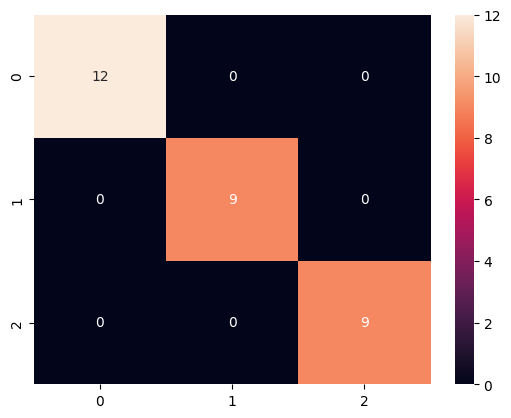

In [9]:
sns.heatmap(cm, annot=True)